<center><b>SCC0252 - Visualização Computacional
<br>Instituto de Ciências Matemáticas e de Computação - USP</b></center>

<br>

---

<center><h2><b>IMDb Movies:<br/> Uma Visualização Exploratória dos Dados</b></h2></center>

---

**Professora: Maria Cristina** 

**Integrantes:**                                         

- Giovanni W. da Costa. __Nº:__ 10431153
- Heitor Carvalho Pinheiroa. __Nº:__ 11833351

# **Bibliotecas**

In [2]:
#ignore Warnings

import warnings
warnings.filterwarnings('ignore')

# Linear Algebra

import numpy as np 
import numpy.linalg as linear_algebra
import math

In [3]:
# DataFrame representation

import pandas as pd

In [4]:
# Visualisation
!pip install matplotlib -q

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

#Bar Chart Race
!pip install bar-chart-race -q
import bar_chart_race as bcr

     |████████████████████████████████| 156 kB 5.1 MB/s 


In [5]:
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ctypes import alignment

In [6]:
# Statistical Models

import statsmodels.api as sm

In [7]:
import operator
import collections
import copy

In [8]:
# Parâmetros globais do Pyplot
# Tamanho das figuras

plt.rcParams['figure.figsize'] = [7, 7]

# Tamanho das fontes nos gráficos

plt.rc('font', size = 14)          # controls default text sizes
plt.rc('axes', titlesize = 17)     # fontsize of the axes title
plt.rc('axes', labelsize = 17)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)    # fontsize of the tick labels
plt.rc('legend', fontsize = 16)    # legend fontsize
plt.rc('figure', titlesize = 18)   # fontsize of vthe figure title

suptitle_size = 20

# **Funções Auxiliares**

Funções que nos auxiliarão no pré-processamento e na manipulação de dados no decorrer do projeto.

In [9]:
def moving_average(values, window):

  n = values.shape[0]

  ma = np.zeros(n - window + 1)

  for i in np.arange(0, n - window + 1):
    
    ma[i] = np.mean(values[i: i + window])

  return ma

In [10]:
def null_duplicated(df):

  duplicates = df.duplicated().sum()
  nulls = df.isnull().sum()

  print(f"Valores duplicados: {duplicates}")
  print(f"\nValores nulos por coluna:\n{nulls}\n")

In [11]:
def con_year(df):
  
  result = np.zeros(df.shape)
  error_indexs = []

  for i, value in enumerate(df.to_numpy()):
    try:
      result[i] = int(value)    
    except:
      error_indexs.append(i)
      result[i] = None 
  
  return result, error_indexs

In [12]:
def extrectGenres(df, init = 0):

  distinctGenres = {}

  for genres_i in df['Genre']:
    for genre in  genres_i.split(', '):

      if genre not in distinctGenres:

        distinctGenres[genre] = copy.deepcopy(init)
  
  return distinctGenres.copy()

In [13]:
def ByGenre(df, col1):

  distinctGenres = extrectGenres(imdb, [])

  for col1, genres in df[[col1, 'Genre']].to_numpy():
    
    genres = genres.split(', ')

    for genre in genres:
      distinctGenres[genre].append(col1)

  return distinctGenres

In [14]:
def reduceDict(dic, func = 'mean'):

  keys = []
  values = []

  used_function = np.mean

  if func != 'mean':
    used_function = func
  
  if func == 'median':
    used_function = np.median

  for key in dic:
    if dic[key] is not []:

      keys.append(key)
      values.append(used_function(dic[key]))

  return [keys, values]

In [15]:
def meanBy(df, col1, col2):

  by = {}

  for v1, v2 in df[[col1, col2]].to_numpy():
    
    if v1 not in by:
      by[v1] = []
    
    if not np.isnan(v2): 
      by[v1].append(v2)

  mBy = []

  for values in by.values():
    mBy.append(np.mean(values))
  
  return [list(by.keys()), mBy]

In [16]:
def plot_ratings(data, bins = "sqrt", label_location = 0):

  #creating intervals bins for the ratings
  n = data.shape[0]

  #creating the figure
  fig = plt.figure(figsize=(12,6))
  values, bins, _ = plt.hist(data, 
                             bins=bins, 
                             color = 'C0', 
                             alpha = 0.8, 
                             edgecolor='black', 
                             linewidth=1.2, 
                             weights=np.ones(n) / n)

  for bin, value in zip(bins, values):
    if value > 0:
      plt.text(bin + label_location, value + 0.01, f'{value:.2f}', rotation = 45)
  
  plt.ylabel('Percent')

  return plt.gca()

# **Objetivos**
1 - Desenvolver uma solução de visualização de dados exploratória para um dos conjuntos de dados sugeridos abaixo, com os recursos de pré processamento e visualização que julgarem apropriados;

2 - As técnicas devem ser adequadas aos dados e às tarefas de visualização/exploração, sendo que vocês devem identificar as tarefas de análise e pré-processamento que desejam apoiar

# **Introdução**

## O Dataset

O dataset escolhido para o trabalho em questão foi o **IMDB Movies Dataset**

O IMDb (Internet Movies Database) reune informações sobre filmes, séries de televisão, video-games e conteúdos de streaming. Também inclui informações sobre o elenco, produção e direção entre muitas outras informações.

Em março de 2022 o website contém mais de 10 milhões de títulos.

O dataset usado contém uma lista dos TOP 1000 filmes listados no IMDb, de acordo com o IMDb Rating.





## **Dicionário de Variáveis**

*** 


* **Poster_Link** - Link para o poster usado no site do IMDb (Arbitrário)
* **Series_Title** - Nome do filme (Arbitrário)
* **Released_Year** - Ano de lançamento (Discreto)
* **Certificate** - Certificado recebido pelo filme (Ordinal)
* **Runtime** - Duração total do filme (Contínuo)
* **Genre** - Gênero do filme (Categórico)
* **IMDB_Rating** - Score do filme no site do IMDb (Contínuo)
* **Overview** - resumo / sinopse (Arbitrário)
* **Meta_score** - Score recebido pelo filme (Discreto)
* **Director** - Nome do Diretor (Arbitrário)
* **Star1,Star2,Star3,Star4** - Nome das estrelas (Arbitrário)
* **Noofvotes** - Número total de votos (Discreto)
* **Gross** - Dinheiro arrecadado pelo Filme (Contínuo)

***

## **1 - Introdução ao Problema**

Ao longo do deste trabalho buscaremos responder algumas questões com base nos dados, tais como:

---

* Número de filmes por ano de lançamento. Qual ano lançou mais, qual menos? 
* Como a média de lançamentos variou ao longo dos anos?
* Qual a disrtibuição de gênero ao longo dos anos?
* Existe relação entre o gênero e o Rating?
* Como o IMDB Rating se relaciona com o Meta score?
* Existe relação entre o gênero e a arrecadação (gross)?

---

Entre outras.


## **2 - Limpeza e pré-processamento dos dados**

In [17]:
#loading the data

imdb = pd.read_csv("https://raw.githubusercontent.com/Heitorcp/SCC0252-Visualizacao-Computacional/master/datasets/imdb/imdb_top_1000.csv")

poster_links = imdb['Poster_Link']

imdb = imdb.drop(["Poster_Link"], axis = 1)

In [18]:
column_names = imdb.columns

# Atributos quantitativos
numerical = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Atributos qualitativos 
ordinal = ['Certificate']
categorical = ['Genre']
arbitrary = ['Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3',	'Star4']

In [19]:
print("Dimensão dos dados :", imdb.shape)

Dimensão dos dados : (1000, 15)


In [20]:
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Verificando a existência de valores nulos ou duplicados

In [21]:
null_duplicated(imdb)

Valores duplicados: 0

Valores nulos por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64



In [22]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


Precisamos converter as seguintes colunas quantitativas:

  * Released_Year : Int
  * Runtime: Int
  * Gross: Float

In [23]:
# Convertendo a variável anos para inteiro 

year, erros = con_year(imdb['Released_Year'])

print(f'Erros, na converção:\n')

[print(f"index {i}: {imdb['Series_Title'][966]}") for i in erros]

Erros, na converção:

index 966: Apollo 13


[None]

Como o ano de lançamento do filme Apolo 13 é 1995, substituímos o valor no dataset

In [24]:
year[966] = 1995

imdb['Released_Year'] = year

In [25]:
imdb["Runtime"] = imdb["Runtime"].apply(lambda time: time.replace(' min', '')).astype(int)

In [26]:
imdb["Gross"] = imdb["Gross"].str.replace(",","").astype(float)

imdb["Gross"] = imdb["Gross"].fillna(np.median(imdb["Gross"].dropna()))
imdb["Meta_score"] = imdb["Meta_score"].fillna(np.median(imdb['Meta_score'].dropna()))


In [27]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   float64
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.3+ KB


Neste dataset, um filme pode pertencer a mais de um gênero. Desse modo, a fim de realizarmos as análises necessárias, dividiremos os gêneros em diferentes colunas.

In [28]:
imdb_02 = imdb.copy()

imdb_02[["Genre01", "Genre02", "Genre03"]] = imdb_02["Genre"].str.split(', ',3,expand=True).fillna(value=np.nan)

#filling NaN genre columns with the previous value 

imdb_02.loc[imdb_02["Genre02"].isnull(), ["Genre02"]] = imdb_02["Genre01"]
imdb_02.loc[imdb_02["Genre03"].isnull(), ["Genre03"]] = imdb_02["Genre01"]

Obtendo o resultado abaixo. Por exemplo, o último filme no dataset é classificado como pertencente aos gêneros: Crime, Mystery e Thriller.

In [106]:
imdb_02[['Genre01', 'Genre02', 'Genre03']].tail()

,Genre01,Genre02,Genre03
995,Comedy,Drama,Romance
996,Drama,Western,Drama
997,Drama,Romance,War
998,Drama,War,Drama
999,Crime,Mystery,Thriller


# **Análise ao Longo do Anos**

Os filmes presentes neste dataset datam de 1920 a 2020. Logo, faremos uma análise de como algumas variáveis como o número de filmes produzidos anualmente, a arrecadação média anual, entre outros variou ao longo destes cem anos.



## Número de Filmes por Ano





In [30]:
released_year = imdb['Released_Year'].value_counts().reset_index()

released_year = released_year.iloc[:released_year.shape[0]-1]

released_year = released_year.sort_values(by="index", ascending=True)

released_year.rename(columns={"index":"year", "Released_Year":"count"}, inplace=True)
released_year.reset_index(inplace=True)
released_year.drop(columns=["index"], inplace=True)

filmes_ma = moving_average(released_year['count'], 10)

In [31]:
fig = px.line(released_year, x='year', y="count", title = "Número de Filmes por Ano", color=px.Constant("Nº de Filmes"), template = 'plotly_white',
              labels = {"count":"Nº de Filmes", "year":"Ano"})
fig.add_scatter(x = released_year['year'][9:], y = filmes_ma, name = "MMA(10)")

fig.show()

A linha vermelha no gráfico acima corresponde a uma média móvel para uma janela de 10 anos.



Podemos perceber que a partir da década de 90, há um crescimento expressivo no número de filmes produzidos anualmente. 

## Arrecadação ao Longo dos Anos

In [32]:
movies_Gross = imdb[["Released_Year", "Gross"]].sort_values(by="Released_Year", ascending=True).groupby('Released_Year', as_index = False).mean()
mean_Gross_10y = movies_Gross["Gross"].rolling(window=10, min_periods=10).mean()

In [33]:
fig = px.line(movies_Gross, x='Released_Year', y="Gross", title = "Arrecadação média dos Filmes ao longo dos anos", template="plotly_white", 
              labels = {"Released_Year":"Ano", "Gross":"Arrecadação"})
fig.add_scatter(x = movies_Gross["Released_Year"], y = mean_Gross_10y, name = "MMA(10)")
fig.show()

Perceba que a arrecadação cresceu conjuntamente com o aumento do número de filmes anuais por volta da década de 90. Aproximando-se dos 100 milhões de dólares em arrecadação no ano de 2020.

## Duração Média dos Filmes ao Longo dos Anos

In [34]:
movies_Runtime = imdb[["Released_Year", "Runtime"]].sort_values(by="Released_Year", ascending=True).groupby('Released_Year', as_index = False).mean()
mean_Runtime_10y = movies_Runtime["Runtime"].rolling(window=10, min_periods=10).mean()

In [35]:
fig = px.line(movies_Runtime, x='Released_Year', y="Runtime", title = "Duração média dos Filmes ao longo dos anos", template="plotly_white",
              labels = {"Runtime":"Duração (min)", "Released_Year":"Ano"})
fig.add_scatter(x = movies_Runtime["Released_Year"], y = mean_Runtime_10y, name = "MMA(10)")
fig.show()

Percebemos que a média de duração dos Filmes até meados da década de 1950 dificilmente ultrapassava os 120 minutos. E, apartir da década de 60, a maioria dos filmes passou a ter uma duração entre 120 e 130 minutos.

Podemos analisar como a duração dos filmes se distribui, através de um Histograma.

Usaremos a regra da raiz para determinar o número de intervalos que nosso histograma deve conter. 

Ela é definida do seguinte modo:

$k=\lceil {\sqrt {n}}\rceil $

onde $n$ é o tamanho da nossa amostra.



Duração Média (min): 122.89
Mediana da duração (min): 119.0



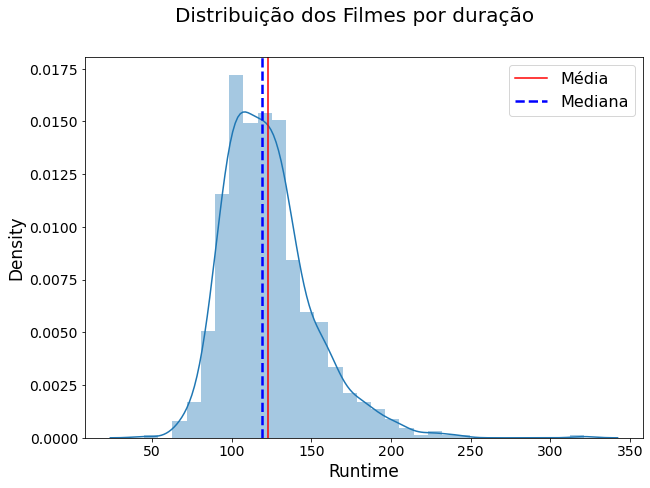

In [36]:
plt.figure(figsize=(10,7), facecolor='white')

print("Duração Média (min):", round(imdb_02["Runtime"].mean(),2))
print("Mediana da duração (min):", round(imdb_02["Runtime"].median(),2))
print()

sns.distplot(imdb_02["Runtime"], bins = math.trunc(np.sqrt(imdb.shape[0])),kde=True)
plt.suptitle("Distribuição dos Filmes por duração", fontsize=20)
plt.axvline(imdb_02["Runtime"].mean(), color="red", label="Média")
plt.axvline(imdb_02["Runtime"].median(), color='blue', ls = '--', lw=2.5, label = "Mediana")
plt.legend()

plt.show()

Os filmes possuem em média uma duração de, aproxidamente, 2h.

E a maioria deles tem duração entre 90 e 130 min, como havíamos notado.

## IMDb Rating ao Longo dos Anos

In [37]:
#calculating the 10 year moving_average for the IMDB Rating

mean_rating = imdb[["Released_Year","IMDB_Rating"]].groupby('Released_Year', as_index=False).mean()
mean_rating_ma = mean_rating["IMDB_Rating"].rolling(window=10, min_periods=10).mean()

In [38]:
#plotting
fig = px.line(mean_rating, x='Released_Year', y="IMDB_Rating", title = "IMDb Rating médo ao longo dos anos", color=px.Constant("Mean"), template = 'plotly_white',
              labels = {"IMDB_Rating":"Mean IMDb Rating", "Released_Year":"Ano"})
fig.add_scatter(x = mean_rating["Released_Year"], y = mean_rating_ma, name = "MMA(10)")


fig.show()

Importante notar que com o passar dos anos houve um pequeno decrescimento no IMDb Rating Médio dos Filmes na plataforma. 

Dito isso, o Imdb rating não acompanhou o crescimento apresentado tanto pela arrecadação quanto pelo aumento da duração dos Filmes.

## Meta-Score Médio ao Longo dos Anos

O Meta Score, diferentemente do IMDb Rating que é definido pela crítica , não é uma medida de avaliação oficial, mas sim uma medida computada a partir dos votos dos usuários dentro da plataforma do IMDb

In [39]:
#calculating the 10 year moving_average for the Meta Score

mean_score = imdb[["Released_Year","Meta_score"]].groupby('Released_Year', as_index=False).mean()
mean_score_ma = mean_score["Meta_score"].rolling(window=10, min_periods=10).mean()

In [108]:
#plotting
fig = px.line(mean_score, x='Released_Year', y="Meta_score", title = "Meta Score médio ao longo dos anos", color=px.Constant("Mean"), template = 'plotly_white',
              labels = {"Meta_score":"MEta Score Médio", "Released_Year":"Ano"})
fig.add_scatter(x = mean_score["Released_Year"], y = mean_score_ma, name = "MMA(10)")


fig.show()

De maneira análoga ao IMDb Rating, o Meta Score também apresenta uma tendência de decrescimento ao longo dos anos, porém, muito mais acentuada.

Conclue-se que a qualidade da produção cinematográfica tem desagrado o público bastante após a década de 1960, passando a apresentar uma tendência de crescimento após 2010.

## Número de Filmes por Gênero ao Longo dos anos

Decidimos criar uma animação que mostra como a produção de filmes por gênero cresce ao longo dos anos.

In [41]:
distinctGenres = extrectGenres(imdb)

In [42]:
genreByYear = {}

for year, genres in imdb[['Released_Year', 'Genre']].to_numpy():

  if year not in genreByYear:
    genreByYear[year] = distinctGenres.copy()
  
  genres = genres.split(', ')

  for genre in genres:
    genreByYear[year][genre] += 1


genreByYear = sorted(genreByYear.items(), key=operator.itemgetter(0))
genreByYear = collections.OrderedDict(genreByYear)

In [43]:
genreByYear_df2 = pd.DataFrame(genreByYear.values(), genreByYear.keys())
genreByYear_df2.index = genreByYear_df2.index.astype(int)

#cumulative sum year by year
genreByYear_df2 = genreByYear_df2.cumsum()

In [44]:
#plotting the cumulative bar chart race as a mp4 embedded

bcr.bar_chart_race(
    df=genreByYear_df2,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=21,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt= 'Ano {x:.0f}',
    period_summary_func=lambda v, r: {'x': .99, 'y': .12,
                                      's': f'Total Movies: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Nº de Filmes por Gênero',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

"bcr.bar_chart_race(\n    df=genreByYear_df2,\n    filename=None,\n    orientation='h',\n    sort='desc',\n    n_bars=21,\n    fixed_order=False,\n    fixed_max=True,\n    steps_per_period=10,\n    interpolate_period=False,\n    label_bars=True,\n    bar_size=.95,\n    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},\n    period_fmt= 'Ano {x:.0f}',\n    period_summary_func=lambda v, r: {'x': .99, 'y': .12,\n                                      's': f'Total Movies: {v.nlargest(6).sum():,.0f}',\n                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},\n    perpendicular_bar_func='median',\n    period_length=500,\n    figsize=(5, 3),\n    dpi=144,\n    cmap='dark12',\n    title='Nº de Filmes por Gênero',\n    title_size='',\n    bar_label_size=7,\n    tick_label_size=7,\n    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},\n    scale='linear',\n    writer=None,\n    fig=None,\n    bar_kwargs={'alpha': .7},\n    filter_column_colo

# Influência dos Atores nas Produções

In [118]:
imdbTop10 = imdb
actorsRev = {}
actorsNVotes = {}
actorsRating = {}
actorsScore = {}

for starNumber in np.arange(1, 5):

  stars = imdbTop10['Star'+str(starNumber)]

  for row in np.arange(imdbTop10.shape[0]):
    
    if stars.iloc[row] not in actorsRev:
      actorsRev[stars.iloc[row]] = 0
      actorsNVotes[stars.iloc[row]] = []
      actorsRating[stars.iloc[row]] = []
      actorsScore[stars.iloc[row]] = []
    
    actorsRev[stars.iloc[row]] += imdbTop10['Gross'].iloc[row]
    actorsNVotes[stars.iloc[row]].append(imdbTop10['No_of_Votes'].iloc[row])
    actorsRating[stars.iloc[row]].append(imdbTop10['IMDB_Rating'].iloc[row])
    actorsScore[stars.iloc[row]].append(imdbTop10['Meta_score'].iloc[row])

In [119]:
actorsDf = pd.DataFrame(actorsRev.keys(), columns = ['Actor'])
actorsDf['Gross'] =  actorsRev.values()

actorsDf['No_of_Votes'] = actorsNVotes.values()
actorsDf['MeanVotes'] = actorsDf['No_of_Votes'].apply(np.mean)

actorsDf['IMDB_Ratings'] = actorsRating.values()
actorsDf['MeanRating'] = actorsDf['IMDB_Ratings'].apply(np.mean)

actorsDf['Meta_score'] = actorsScore.values()
actorsDf['MeanScore'] = actorsDf['Meta_score'].apply(np.mean)

In [120]:
actorsDf = actorsDf.sort_values(by="Gross", ascending=False)

In [45]:
actorsList = []

for starNumber in np.arange(1, 5):

  stars = imdb['Star'+str(starNumber)]

  for row in np.arange(imdb.shape[0]):

    actorsList.append([stars.iloc[row]] + list(imdb[['Series_Title', 'Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']].iloc[row]))


In [46]:
actors = pd.DataFrame(actorsList, columns = ['Actor','Series_Title','Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes'])
byActors = actors.groupby('Actor', as_index = False).sum().sort_values('Gross',ascending=False)

In [47]:
top10Actors = byActors[:10]
top10ActorsList = actors[actors['Actor'].isin(top10Actors['Actor'])]

## Arrecadação Média por Ator/Atriz

In [109]:
fig = px.bar(top10ActorsList, 
             x='Actor',
             y='Gross',
             color='Meta_score',
             hover_name='Series_Title',
             text='IMDB_Rating',
             title='Atores/Atrizes com maiores arrecadações', 
             color_discrete_sequence=px.colors.sequential.Viridis,
             labels = {"Gross":"Arrecadação", "Actor":"Ator/Atriz"},
             template = 'plotly_white')

fig.update_xaxes(categoryarray = top10Actors['Actor'])

fig.show()

## Distribuição da Arrecadação por Ator/Atriz

In [101]:
fig = px.box(top10ActorsList, x = 'Actor', y = 'Gross', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             template = 'plotly_white',
             title = "Distribuição da Arrecadação Média por Ator/Atriz",
             labels = {"Gross":"Arrecadação", "Actor":"Ator/Atriz"})
fig.update_xaxes(categoryarray =top10Actors['Actor'])

fig.update(layout_showlegend=False)
fig.show()

## Distribuição do IMDb Rating para os Top10 Atores/Atrizes

In [102]:
fig = px.box(top10ActorsList, x = 'Actor', y = 'IMDB_Rating', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             template = 'plotly_white',
             labels = {"IMDB_Rating":"IMDb Rating", "Actor":"Ator/Atriz"},
             title = "Distribuição do IMDb Rating para os Top 10 estrelas em Arrecadação")
fig.update_xaxes(categoryarray =top10Actors['Actor'])

fig.update(layout_showlegend=False)
fig.show()

## Distribuição do Meta Score para as Top10 Estrelas em Arrecadação

In [103]:
fig = px.box(top10ActorsList, x = 'Actor', y = 'Meta_score', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             template = 'plotly_white',
             labels = {"Meta_score":"Meta Score", "Actor":"Ator/Atriz"},
             title = "Distribuição do Meta Score para as Top10 estrelas em Arrecadação")
fig.update_xaxes(categoryarray =top10Actors['Actor'])

fig.update(layout_showlegend=False)
fig.show()

In [126]:
fig = px.bar(actorsDf[:10], x='Actor', y='MeanScore', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             title = "Meta Score médio para os Top 10 Atores em arrecadação",
             template = 'plotly_white',
             labels = {"MeanScore":"Meta Score Médio", "Actor":"Ator/Atriz"})
fig.update_yaxes(range = [70,81])
fig.update(layout_showlegend=False)
fig.show()

Para além, é interessante notar que os atores com as maiores arrecadações brutas, não correspondem necessariamente ao atores presentes nos filmes com as melhores avaliações médias dadas pelos usuários na plataforma (Meta Score). Isso indica que a arrecadação de um título não depende diretamente da avaliação do público sobre a obra

## Distribuição do Nº de Votos para as Top 10 Estrelas em Arrecadação

In [104]:
fig = px.box(top10ActorsList, x = 'Actor', y = 'No_of_Votes', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             template = 'plotly_white',
             labels = {"No_of_Votes":"Nº de Votos", "Actor":"Ator/Atriz"},
             title = "Distribuição do número de Votos para as Top 10 Estrelas")
fig.update_xaxes(categoryarray =top10Actors['Actor'])

fig.update(layout_showlegend=False)
fig.show()

In [128]:
fig = px.bar(actorsDf[:10], x='Actor', y='MeanVotes', color = 'Actor', color_discrete_sequence=px.colors.sequential.Viridis,
             title = "Nº de Votos Médios para os Top 10 Atores em arrecadação",
             template = 'plotly_white',
             labels = {"MeanVotes":"Votos Médios", "Actor":"Ator/Atriz"})

fig.update(layout_showlegend=False)
fig.show()

Os atores presentes nos filmes com as maiores arrecadações também possuem os maiores números de votos, quando comparado à média do dataset de cerca de 230 mil votos como observado na Figura da distribuição de votos acumulados por ator.

## Distribuição do Número de Votos

### Distribuição do Número de Votos cumulativa por Ator

In [155]:
print("Média dos Votos Acumulados por Ator/Atriz", round(np.mean(actorsDf.MeanVotes),2))

fig = px.box(actorsDf, x = 'MeanVotes', color_discrete_sequence=px.colors.sequential.Viridis,
             template = 'plotly_white',
             labels = {"MeanVotes":"Votos Médios"},
             title = "Distribuição do número de Votos Acumulado por Ator")

fig.update(layout_showlegend=False)
fig.show()



Média dos Votos Acumulados por Ator/Atriz 230178.19


# Análise dos TOP 10 Filmes no IMDb

In [200]:
top10SeriesNames = imdb.sort_values('Gross',ascending=False)['Series_Title'][:10]
top10SeriesList = actors[actors['Series_Title'].isin(top10SeriesNames)]

#grouping by IMDb rating
top10SeriesNamesIMDb = imdb.sort_values('IMDB_Rating',ascending=False)['Series_Title'][:10]
top10SeriesListImdb = actors[actors['Series_Title'].isin(top10SeriesNamesIMDb)]

top10SeriesListImdb['isTop10Actor'] = top10SeriesList['Actor'].isin(top10Actors['Actor'])

In [56]:
top10SeriesList['isTop10Actor'] = top10SeriesList['Actor'].isin(top10Actors['Actor'])

In [57]:
top10Series = top10SeriesList.groupby('Series_Title', as_index = False)

### Top 10 Filmes em Arrecadação

In [177]:
fig = px.bar( imdb.sort_values('Gross',ascending=False)[:10], x = 'Series_Title', y = 'Gross', color = "Series_Title",
             color_discrete_sequence=px.colors.sequential.Viridis,
             text = "IMDB_Rating",
             title = 'Top 10 Filmes em Arrecadação', template = 'plotly_white',
             labels = {"Gross":"Arrecadação","Series_Title":"Título"})

fig.update(layout_showlegend=False)
fig.show()

## Arrecadação dos Top 10 segundo o IMDb Rating

In [178]:
fig = px.bar( imdb.sort_values('IMDB_Rating',ascending=False)[:10], x = 'Series_Title', y = 'Gross', color = "Series_Title",
             color_discrete_sequence=px.colors.sequential.Viridis,
             text = "IMDB_Rating",
             title = 'Arrecadação dos Top 10 Filmes segundo o IMDb Rating', template = 'plotly_white',
             labels = {"Gross":"Arrecadação","Series_Title":"Título"})

fig.update(layout_showlegend=False)
fig.show()

Os filmes mais bem avaliados na plataforma segundo o IMDb Rating possuem arrecadação muito inferior aos filmes com maiores arrecadações. O que evidencia

In [196]:
top10Series.sum().sort_values('Gross', ascending=False)

,Series_Title,Gross,IMDB_Rating,Meta_score,No_of_Votes,isTop10Actor
5,Star Wars: Episode VII - The Force Awakens,3.746649e+09,31.6,320.0,3443292,0
1,Avengers: Endgame,3.433492e+09,33.6,312.0,3239820,4
0,Avatar,3.042030e+09,31.2,332.0,4475992,0
2,Avengers: Infinity War,2.715262e+09,33.6,272.0,3337908,3
9,Titanic,2.637302e+09,31.2,300.0,4184356,1
6,The Avengers,2.493118e+09,32.0,276.0,5043224,2
3,Incredibles 2,2.434327e+09,30.4,320.0,1000228,0
7,The Dark Knight,2.139434e+09,36.0,336.0,9212928,0
4,Rogue One,2.128709e+09,31.2,260.0,2226432,0
8,The Dark Knight Rises,1.792556e+09,33.6,312.0,6065384,0


In [176]:
fig = px.bar(top10Series.sum().sort_values('Gross', ascending=False), x = 'Series_Title', y = 'isTop10Actor', color = 'Series_Title',
             
             color_discrete_sequence=px.colors.sequential.Viridis,
             labels = {"IsTop10Actor":"Top 10 Ator/Atriz","Series_Title":"Título"},
             title = "Nº de Top Atores entre os Top 10 filmes em Arrecadação",
             template = 'plotly_white')

fig.update(layout_showlegend=False)
fig.show()

In [202]:
topimdb_nactors = top10SeriesListImdb.sort_values(by="IMDB_Rating", ascending=False).groupby('Series_Title')['isTop10Actor'].sum().reset_index()

fig = px.bar(topimdb_nactors, x = 'Series_Title', y = 'isTop10Actor', color = 'Series_Title',
             
             color_discrete_sequence=px.colors.sequential.Viridis,
             labels = {"IsTop10Actor":"Top 10 Ator/Atriz","Series_Title":"Título"},
             title = "Nº de Top Atores entre os Top 10 filmes no IMDb Rating",
             template = 'plotly_white')

fig.update(layout_showlegend=False)
fig.show()


O gráfico acima, em branco propositalmente, apenas nos indica que os melhores filmes na plataforma segundo o IMDb Rating não possuem nenhum ator ou atriz no elenco que figuram-se nos filmes com as maiores arrecadações.


# Análise por Gênero

Podemos perceber que filmes que pertencem exclusivamente ao gênero Drama são os mais frequentes. Porém, muitos filmes são classificados como pertencentes a mais de um gênero. Vamos verficar qual a contagem única de cada gênero no conjunto de dados.

In [62]:
def extractGenre(lst):
  return list(map(lambda x: x.split(", "), lst))
 
def distinctGenres(lst):

  """
  Returns all distinct genres in the dataset
  """

  distinctGenre = []

  for l in lst:
    for el in l:
      if el in distinctGenre:
        pass
      else:
        distinctGenre.append(el)

  return distinctGenre

def countGenre(df):

  #list with unique genres
  unique_genres = list(imdb.Genre.unique())

  #list with distinct genres
  distinct_genres = distinctGenres(extractGenre(unique_genres))
  
  #creating genre dictionaries with zero key-values
  genre_dict = dict.fromkeys(distinct_genres, 0)

  #counting each genre appearance
  for lst in imdb.Genre.str.split(", "):
    for genre in lst:
      genre_dict[genre] += 1

  #creating a df from the dict 

  genre_df = pd.DataFrame.from_dict(genre_dict, orient='index',
                       columns = ["Count"])

  genre_df = genre_df.sort_values(by="Count", ascending=False)
  genre_df.reset_index(inplace=True)
  genre_df.rename(columns = {"index":"Genre"}, inplace=True)

  #adding a frequency column to the dataframe 

  genre_df["Frequency"] = (round(genre_df["Count"] / genre_df["Count"].sum(),2))

  return genre_df

genre_df = countGenre(imdb)

In [63]:
fig = go.Figure(
    layout = go.Layout(
        title = go.layout.Title(text="Distribuição dos gêneros dos Filmes"),
        template = 'plotly_white'
    )
)

fig.add_trace(go.Bar(
    x=genre_df["Count"],
    y=genre_df["Genre"],
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Genre Count',
    orientation='h'
))

#Labbeling the scatter plot
fig.update_layout(
    margin=dict(l=100, r=10, t=80, b=80),
)

fig.show()

genre_df.head()

,Genre,Count,Frequency
0,Drama,724,0.28
1,Comedy,233,0.09
2,Crime,209,0.08
3,Adventure,196,0.08
4,Action,189,0.07


Sabemos que 724 filmes no dataset possuem o gênero Drama como pelo menos um dos gêneros pelos quais podem ser classificados. Desse modo, pode-se concluir que cerca de 72% dos filmes enquadram-se dentro do gênero Drama.

Vamos converter a coluna Gross para númerico para que possamos agregar e somar os valores por Gênero.

Além disso, como um filme pode ter mais de um gênero e o número máximo de gêneros para um mesmo filme é três, vamos a coluna Genre em três colunas Genre01, Genre02 e Genre03

In [64]:
imdb_02 = imdb.copy()

imdb_02[["Genre01", "Genre02", "Genre03"]] = imdb_02["Genre"].str.split(', ',3,expand=True).fillna(value=np.nan)

#filling NaN genre columns with the precious value 

imdb_02.loc[imdb_02["Genre02"].isnull(), ["Genre02"]] = imdb_02["Genre01"]
imdb_02.loc[imdb_02["Genre03"].isnull(), ["Genre03"]] = imdb_02["Genre01"]

#grouping by genre 

imdb_by_genre1 = imdb_02.groupby("Genre01")
imdb_by_genre2 = imdb_02.groupby("Genre02")
imdb_by_genre3 = imdb_02.groupby("Genre03")

agg_genre1 = imdb_by_genre1.sum()
agg_genre2 = imdb_by_genre2.sum()
agg_genre3 = imdb_by_genre3.sum()

ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp = final_genre.reset_index()

#renaming 
genre_temp.rename(columns = {"index":"Genre"}, inplace=True)

#striping white spaces from Genre strings
genre_temp["Genre"] = genre_temp["Genre"].str.strip()

#adding the genre count to the aggregated df 
genre_count_dict = dict(zip(genre_df.Genre, genre_df.Count))
genre_temp["Count"] = genre_temp["Genre"].map(genre_count_dict)

genre_temp.head().sort_values(by="Gross", ascending=False)

,Genre,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Count
1,Adventure,408849.0,25919.0,1630.7,15991.0,86454989.0,2.989093e+10,196
0,Action,409578.0,26046.0,1631.7,15246.0,87384391.0,2.497640e+10,189
4,Comedy,626838.0,34868.0,2486.0,24691.0,68684620.0,1.640516e+10,233
2,Animation,166155.0,8238.0,658.1,6708.0,22003859.0,8.926982e+09,82
3,Biography,241845.0,16200.0,960.8,9311.0,30751709.0,6.225616e+09,109


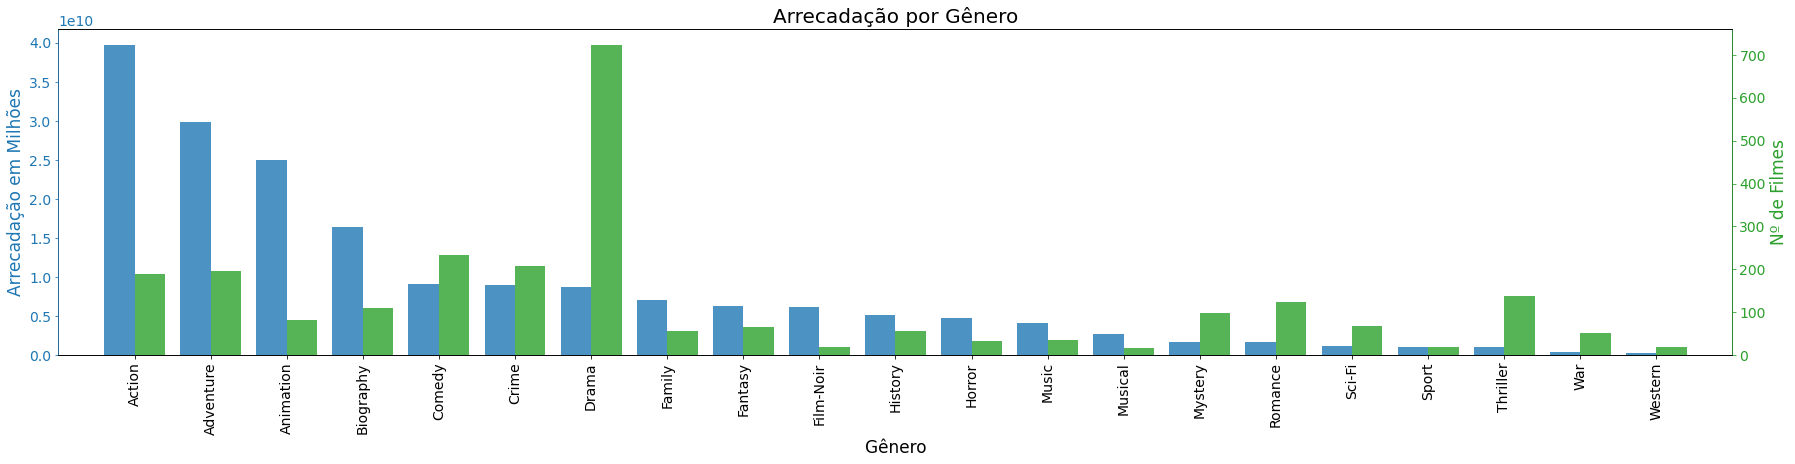

In [65]:
fig = plt.figure(figsize = (30, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

genre_temp.sort_values('Gross',ascending=False).plot(kind='bar', x= 'Genre', y = 'Gross', color='C0', ax=ax, width=width, position=1, alpha = 0.8, label = 'Gross')
genre_temp.plot(kind='bar', x= 'Genre', y = 'Count', color='C2', ax=ax2, width=width, position=0, alpha = 0.8, label = 'Count')

ax.get_legend().remove()
ax2.get_legend().remove()

ax.set_ylabel('Arrecadação em Milhões', color = 'C0')
ax2.set_ylabel('Nº de Filmes', color = 'C2')

ax2.spines['left'].set_color('C0')
ax2.spines['right'].set_color('C2')

ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C2')

plt.xlim(-1, 21)

ax.set_xlabel("Gênero")
plt.title("Arrecadação por Gênero", fontsize=20)

plt.show()

In [66]:
genre_temp['MeanGross(Mi)'] = genre_temp['Gross'] / genre_temp['Count']/1000000

In [67]:
TOP10MeanGross = genre_temp.sort_values('MeanGross(Mi)',ascending=False)[['Genre', 'MeanGross(Mi)']][:10]

TOP10MeanGross.head(10).round()


,Genre,MeanGross(Mi)
1,Adventure,153.0
16,Sci-Fi,137.0
0,Action,132.0
2,Animation,109.0
8,Fantasy,96.0
7,Family,91.0
4,Comedy,70.0
3,Biography,57.0
6,Drama,55.0
11,Horror,54.0


Os gêneros mais produzidos ao longo dos anos não são os gêneros com a maior arrecadação bruta. Desse modo, caso o objetivo da produção seja uma maior arrecadação, vale a pena investir em filmes de Aventura, Sci-fi ou Ação.

In [68]:
ratingByGenre = ByGenre(imdb, 'IMDB_Rating')
ratingByGenre = ByGenre(imdb, 'Gross')

key, values_mean = reduceDict(ratingByGenre)
_, values_median = reduceDict(ratingByGenre, 'median')

statRatingByGenre = np.array([key, values_mean, values_median]).T
statRatingByGenre = pd.DataFrame(statRatingByGenre, columns = ['Genre', 'MeanRating', 'MedianRating'])

statRatingByGenre['MeanRating'] = statRatingByGenre['MeanRating'].astype(float)
statRatingByGenre['MedianRating'] = statRatingByGenre['MedianRating'].astype(float)

In [69]:
fig = px.bar(statRatingByGenre.sort_values('MeanRating',ascending=False), x = 'Genre', y = ['MeanRating', 'MedianRating'], 
       title = 'Arrecadação por Gênero', labels = {"Genre":"Gênero", "value":"Arrecadação (Mi)"}, template = 'plotly_white', barmode = 'group')


fig.show()

Interessante perceber que apesar do gênero Drama ser o mais frequente os filmes de Guerra (War) e Faroeste (Western) são os mais bem avaliados na plataforma do IMDb.

In [70]:
ScoreByGenre = ByGenre(imdb, 'Meta_score')

key, values_mean = reduceDict(ScoreByGenre)
_, values_median = reduceDict(ScoreByGenre, 'median')

statScoreByGenre = np.array([key, values_mean, values_median]).T
statScoreByGenre = pd.DataFrame(statScoreByGenre, columns = ['Genre', 'MeanScore', 'MedianScore'])

statRatingByGenre['MeanScore'] = statScoreByGenre['MeanScore'].astype(float)
statRatingByGenre['MedianScore'] = statScoreByGenre['MedianScore'].astype(float)

In [71]:
fig = px.bar(statRatingByGenre.sort_values('MeanRating',ascending=False), x = 'Genre', y = ['MeanScore', 'MedianScore'], range_y=[70, 90], 
       title = 'Meta Score por Gênero', labels = {"Genre":"Gênero", "value":"Meta Score"}, template = 'plotly_white', barmode = 'group',)

fig.show()

## Relação entre Gross, IMDB Rating, Meta Score e Número de votos

In [72]:
fig = px.scatter(imdb, 
                 y = 'Meta_score', 
                 x = 'IMDB_Rating', 
                 size = 'Gross', 
                 color = 'No_of_Votes', 
                 hover_name = 'Series_Title', 
                 color_continuous_scale='RdYlGn_r',
                 labels = {"IMDB_Rating":"IMDB Rating", "Meta_score":"Meta Score"},
                 template = 'plotly_white')

fig.layout.coloraxis.colorbar.title = 'Número de Votos'

fig.show()

A partir desse gráfico, notamos que o Meta Score está relacionada positivamente ao IMDB Rating, no entanto, não parece haver correlação com arrecadação ou o número de votos.

## Outras Distribuições

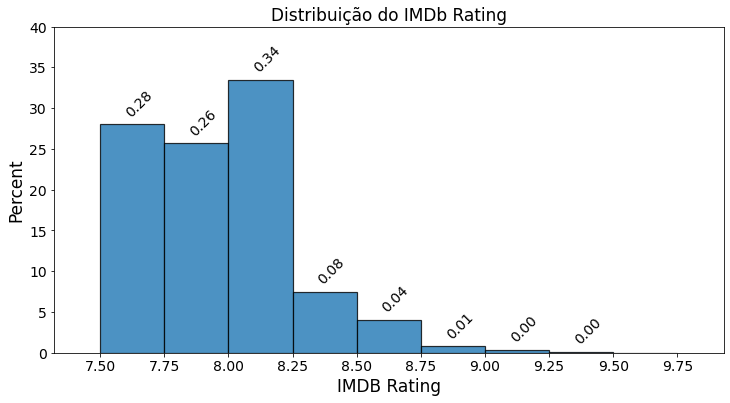

In [73]:
rating_bins = np.arange(7.5,10,0.25) 

ax = plot_ratings(imdb["IMDB_Rating"], bins = rating_bins, label_location = 0.09)

plt.sca(ax)

plt.xticks(rating_bins)
plt.yticks(np.arange(0, 0.45, 0.05), labels = range(0, 45, 5))

plt.margins(x=0.08, y = 0.075)
plt.ylim(0, 0.4)
plt.xlabel('IMDB Rating')
plt.title('Distribuição do IMDb Rating')
plt.show()

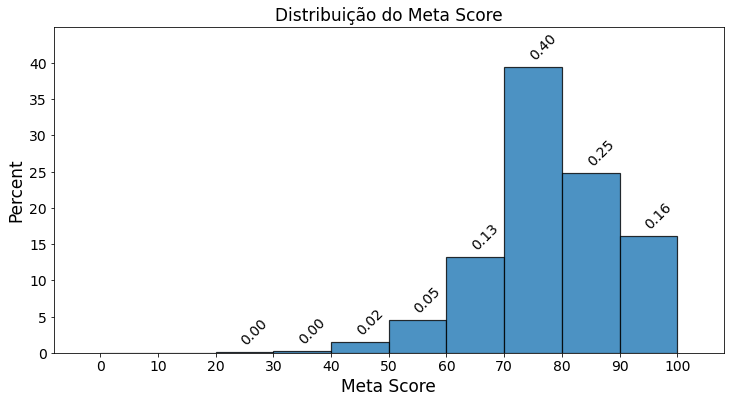

In [74]:
rating_bins = np.arange(0, 101, 10) 

ax = plot_ratings(imdb["Meta_score"], bins=rating_bins, label_location = 4)

plt.sca(ax)

plt.xticks(rating_bins)
plt.yticks(np.arange(0, 0.45, 0.05), labels = range(0, 45, 5))

plt.margins(x=0.08, y = 0.075)
plt.ylim(0, 0.45)
plt.xlabel('Meta Score')

plt.title('Distribuição do Meta Score')
plt.show()

Outro fato interessante, é a mudança de uma assimetria a direita para uma a esquerda, das avaliações dos usuários para as da plataforma. Dessa forma, em uma há poucas produções muito bem avaliadas, enquanto as outras há poucas mal avaliádas, respectivamente.

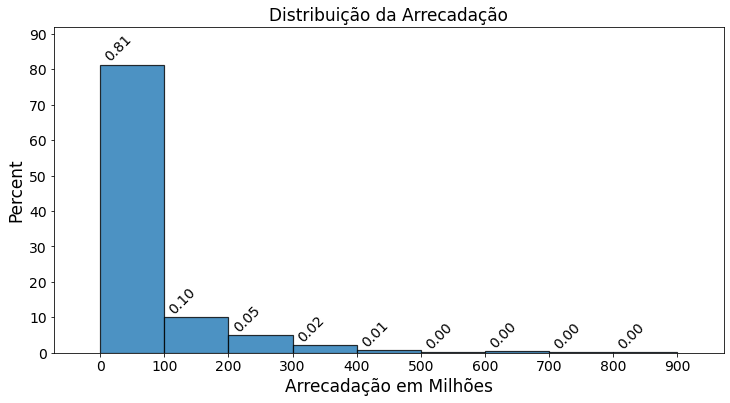

In [75]:
rating_bins = np.arange(0, 1000, 100) 

ax = plot_ratings(imdb["Gross"]/1000000, bins = rating_bins, label_location = 4)

plt.sca(ax)

plt.xticks(rating_bins)
plt.yticks(np.arange(0, 0.95, 0.1), labels = range(0, 95, 10))

plt.margins(x=0.08, y = 0.075)
plt.ylim(0, 0.92)
plt.xlabel('Arrecadação em Milhões')
plt.title('Distribuição da Arrecadação')

plt.show()